In [19]:
import pandas as pd
from scipy.stats import mode
low_memory=False

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [20]:
df = pd.read_csv(r'/home/ariana/meu_projeto/meu_projeto_env/pyjamas/df2009_df2018.csv', delimiter=',')

In [21]:
df.head()

,IDADE,ANO,SEXO,SITUACAO,CURSO
0,29,2009,Masculino,Cursando,ANALISE E DESENVOLVIMENTO DE SISTEMAS
1,21,2009,Masculino,Desvinculado do curso,ANALISE E DESENVOLVIMENTO DE SISTEMAS
2,20,2009,Masculino,Cursando,COMPUTACAO
3,41,2009,Masculino,Matrícula trancada,ANALISE E DESENVOLVIMENTO DE SISTEMAS
4,18,2009,Masculino,Cursando,INFORMATICA


In [22]:
df['CURSO'].unique()

array(['ANALISE E DESENVOLVIMENTO DE SISTEMAS', 'COMPUTACAO',
       'INFORMATICA', 'TECNOLOGIA DA INFORMACAO'], dtype=object)

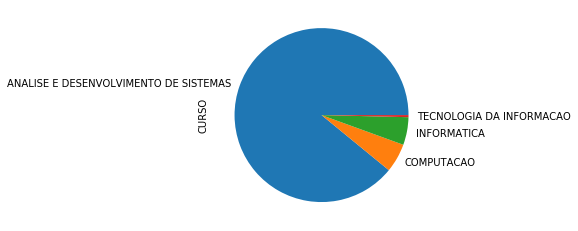

In [23]:
df['CURSO'].value_counts().plot.pie()

In [59]:
idade = pd.crosstab(index=df['IDADE'], columns=df['SEXO'],  margins=True)
idade.head(100)

SEXO,Feminino,Masculino,All
IDADE,,,
13,0,2,2
15,0,7,7
16,17,66,83
17,718,2605,3323
18,8692,36118,44810
19,14793,62152,76945
20,17327,75893,93220
21,16998,78697,95695
22,15329,74267,89596


In [24]:
masc = df[df['SEXO'] == 'Masculino'] 
femi = df[df['SEXO'] == 'Feminino']

In [25]:
id_si_cu_masc = masc[['IDADE', 'SITUACAO', 'CURSO'] ]
id_si_cu_femi = femi[['IDADE', 'SITUACAO', 'CURSO'] ]

In [26]:
masc_avg = id_si_cu_masc['IDADE'].mean()
femi_avg = id_si_cu_femi['IDADE'].mean()

print("Media da idade dos homens", masc_avg)
print("Media da idade das mulheres:", femi_avg)

Media da idade dos homens 27.16455079521461
Media da idade das mulheres: 26.61389170613547


In [54]:
mode(id_si_cu_masc['IDADE']).mode[0]

21

In [55]:
mode(id_si_cu_femi['IDADE']).mode[0]

20

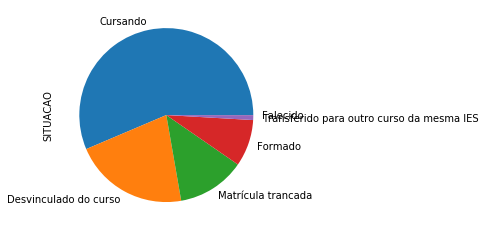

In [89]:
df["SITUACAO"].value_counts().plot.pie()

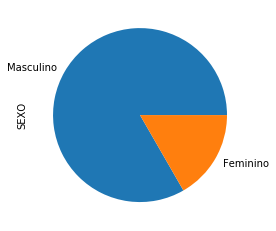

In [90]:
df["SEXO"].value_counts().plot.pie()
plt.savefig('/home/ariana/projetos/analise/sexo.png', transparent = True)

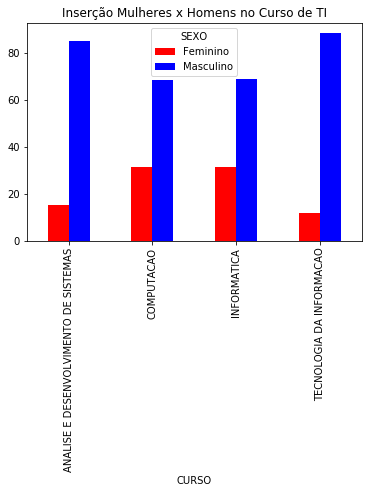

In [91]:
curso_sexo = pd.crosstab(df['CURSO'],df['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
curso_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Inserção Mulheres x Homens no Curso de TI')

In [92]:
curso_sexo

SEXO,Feminino,Masculino
CURSO,,
ANALISE E DESENVOLVIMENTO DE SISTEMAS,14.981198,85.018802
COMPUTACAO,31.442550,68.557450
INFORMATICA,31.169762,68.830238
TECNOLOGIA DA INFORMACAO,11.696031,88.303969


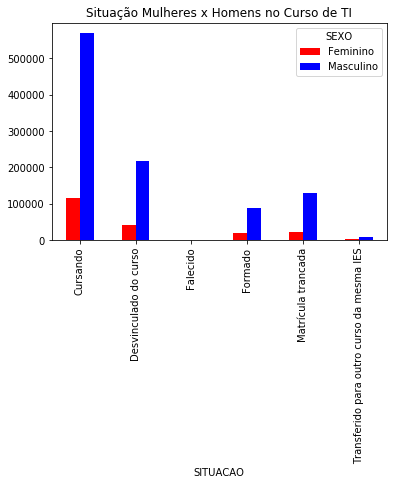

In [93]:
situacao_sexo = pd.crosstab(df['SITUACAO'],df['SEXO'])
situacao_sexo.plot(kind='bar',width=0.5, color=['red','blue'], title='Situação Mulheres x Homens no Curso de TI')

In [94]:
curso_ano = pd.crosstab(df['ANO'],df['SEXO'])
curso_ano

SEXO,Feminino,Masculino
ANO,,
2009,10164,40309
2010,13887,58140
2011,16777,73014
2012,19052,86917
2013,20876,98899
2014,23483,115072
2015,23559,121969
2016,23639,129352
2017,24430,136797


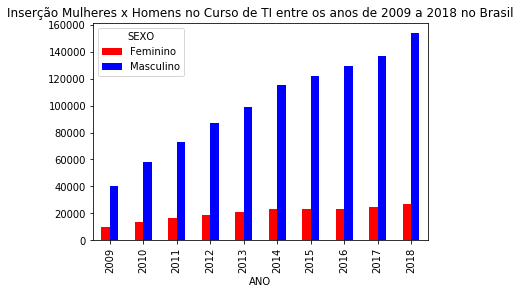

In [95]:
curso_ano.plot(kind='bar',width=0.5, color=['red','blue'], title='Inserção Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil' ,grid=False)
plt.savefig('/home/ariana/projetos/analise/mulherxhomem.png', transparent = True)

In [96]:
curso_ano_per = pd.crosstab(df['ANO'],df['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100

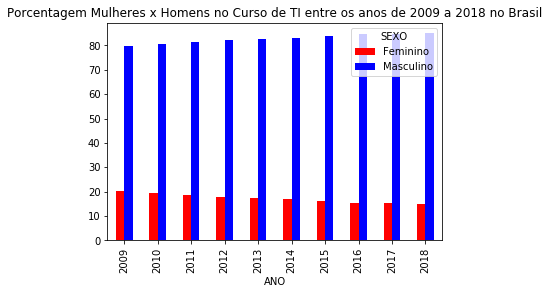

In [97]:
curso_ano_per.plot(kind='bar',width=0.5, color=['red','blue'], title='Porcentagem Mulheres x Homens no Curso de TI entre os anos de 2009 a 2018 no Brasil' ,grid=False)

In [98]:
x = pd.DataFrame(df.query('SITUACAO == "Formado" and SEXO =="Masculino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))
y = pd.DataFrame(df.query('SITUACAO == "Formado" and SEXO =="Feminino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))

z = pd.DataFrame(df.query('SITUACAO == "Cursando" and SEXO =="Masculino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))
w = pd.DataFrame(df.query('SITUACAO == "Cursando" and SEXO =="Feminino" and CURSO == "ANALISE E DESENVOLVIMENTO DE SISTEMAS"'))



In [99]:
data = pd.concat([x, y, z, w])

In [100]:
data.head()

,IDADE,ANO,SEXO,SITUACAO,CURSO
104,26,2009,Masculino,Formado,ANALISE E DESENVOLVIMENTO DE SISTEMAS
108,21,2009,Masculino,Formado,ANALISE E DESENVOLVIMENTO DE SISTEMAS
230,23,2009,Masculino,Formado,ANALISE E DESENVOLVIMENTO DE SISTEMAS
270,27,2009,Masculino,Formado,ANALISE E DESENVOLVIMENTO DE SISTEMAS
288,23,2009,Masculino,Formado,ANALISE E DESENVOLVIMENTO DE SISTEMAS


In [101]:
sit_sex = pd.crosstab(data['SITUACAO'],data['SEXO']).apply(lambda r: r/r.sum(), axis=1) * 100
sit_sex

SEXO,Feminino,Masculino
SITUACAO,,
Cursando,14.837883,85.162117
Formado,15.913133,84.086867


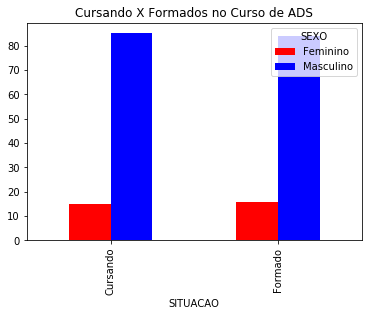

In [102]:
sit_sex.plot(kind='bar',width=0.5, color=['red','blue'], title='Cursando X Formados no Curso de ADS')
plt.savefig('/home/ariana/projetos/analise/formados_sexo.png', transparent = True)

In [103]:
sit_ano = pd.crosstab(data['ANO'],data['SITUACAO']).apply(lambda r: r/r.sum(), axis=1) * 100
sit_ano

SITUACAO,Cursando,Formado
ANO,,
2009,90.411962,9.588038
2010,87.475000,12.525000
2011,87.001977,12.998023
2012,87.829746,12.170254
2013,87.414197,12.585803
2014,86.000541,13.999459
2015,84.413776,15.586224
2016,83.934510,16.065490
2017,85.161905,14.838095


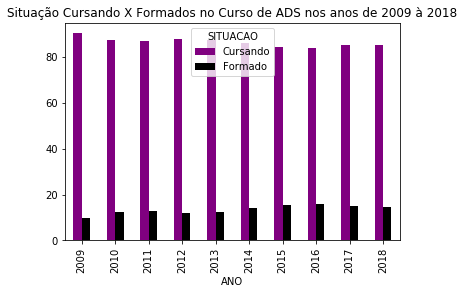

In [80]:
sit_ano.plot(kind='bar',width=0.5, color=['purple','black'], title='Situação Cursando X Formados no Curso de ADS nos anos de 2009 à 2018')
plt.savefig('/home/ariana/projetos/analise/formados_ads.png', transparent = True)